# **[데이터 준비]**

*   title_list: 공지사항 제목 리스트
*   top3_list: 각 공지사항에서 중요도 상위 3개의 값
*   df_keyword3: top3_list를 데이터프레임화 한 것





In [33]:
#1.데이터 불러오기(데이터형확인)(dim,shape)
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/db.sheet.csv'
dataset = pd.read_csv(file_path,header=None)

# 데이터 확인
print(dataset)
print(dataset.dtypes)# 각 열의 데이터 타입 확인
print(dataset.shape)# 데이터의 행과 열의 개수 확인

#titleSet keywordSet나누기
X = dataset.iloc[:, 1] #titleSet
y1 = dataset.iloc[:, 2] #keywordSet1
y2 = dataset.iloc[:, 3] #keywordSet2
y3 = dataset.iloc[:, 4] #keywordSet3

print("X_dataset")
print(X)
print("X_shape")
print(X.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      0                                                  1       2     3  \
0    경력                           [채용] 본교 인재개발원 연구원 채용 공고     인재개발   연구원   
1    경력  [인재개발원/채용상담회] 한국경제인협회(구 전국경제인연합회) 채용상담회: 11.1....    경제협회    채용   
2    경력                               [채용] 산학협력단 직원 채용 공고    산학협력단    직원   
3    학사  [글로벌소통교육실] 겨울계절학기 영어 말하기프로그램 Speaking Master P...  겨울계절학기    영어   
4    일반  [언어교육원] 2023학년도 싱가포르 NTU 난양공대 위탁과정 언어교육원 한국어도우...    싱가포르  언어교육   
..   ..                                                ...     ...   ...   
215  일반             [채용]이화여자대학교 산학협력단 직원(사업관리 및 정산) 채용 공고    산학협력단    직원   
216  일반                      [조교모집] 23-2 건축학전공 A/B급 조교 모집      건축학     A   
217  일반             [정책과학대학원] 2023학년도 2학기 B급 학생조교 모집 (마감)     정책과학    B급   
218  일반                      [조교모집] 2023-2학기 수학과 B급 조교 모집      수학과    B급   
219  일반                [교육혁신센터] 맞춤형

In [19]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [20]:
#필요한 라이브러리 불러오기(분해 이전)

import numpy as np

!pip install kiwipiepy
from kiwipiepy import Kiwi

!pip install keybert
from keybert import KeyBERT

!pip install transformers
from transformers import BertModel


model = BertModel.from_pretrained('skt/kobert-base-v1')
kw_model = KeyBERT(model)

In [21]:
import re

# Kiwi 형태소 분석기 초기화
kiwi = Kiwi()

# 정규표현식을 사용하여 알파벳이 포함된 단어를 걸러내는 패턴
alphabet_pattern = re.compile('[a-zA-Z]')

# 각 행의 키워드를 저장할 리스트
X_kiwi = []

# 각 행을 처리하여 키워드 추출 후 저장
for title in X:
    # Kiwi 형태소 분석 수행
    kiwi_result = kiwi.analyze(title)

    # 명사 추출 함수
    def noun_extractor_kiwi(kiwi_result):
        nouns = []
        for token, pos, _, _ in kiwi_result[0][0]:
            if len(token) != 1 and (pos.startswith('N') or pos.startswith('SL')) and not alphabet_pattern.search(token):
                nouns.append(token)
        return nouns

    # 명사 추출
    nouns = noun_extractor_kiwi(kiwi_result)

    # 추출된 명사를 X_kiwi에 추가
    X_kiwi.append(nouns)

for i in range(len(X_kiwi)):
  print(X_kiwi[i])


['채용', '본교', '인재', '개발원', '연구원', '채용', '공고']
['인재', '개발원', '채용', '상담회', '한국', '경제인', '협회', '전국경제인연합회', '채용', '상담회']
['채용', '산학', '협력단', '직원', '채용', '공고']
['글로벌', '소통', '교육실', '겨울', '계절', '학기', '영어', '말하기', '프로그램', '등록', '안내']
['언어', '교육원', '학년도', '싱가포르', '공대', '위탁', '과정', '언어', '교육원', '한국어', '도우미', '모집']
['교육', '혁신', '센터', '융합', '수업', '운영', '사례', '공유', '융합', '수업', '운영', '사례', '발표', '전시', '안내']
['인재', '개발원', '학년도', '겨울', '방학', '현장', '실습', '모집', '안내']
['학년도', '전기', '졸업', '예정', '여부', '조회', '졸업', '의사', '신청', '관련', '안내']
['국제', '학생증', '발급', '지원', '행사', '안내']
['학년도', '전공', '변경', '시행', '안내']
['학년도', '시행', '안내']
['국제', '교류', '싱가포르', '교환', '프로그램', '설명회']
['대학', '건강', '센터', '학생', '건강', '검사', '시행', '안내']
['연구윤리', '센터', '연구윤리', '특강', '신청', '안내']
['학부', '학년도', '학기', '이화', '플러스', '장학금', '신청', '안내']
['다문화', '연구소', '상호', '문화', '학술', '대회', '외국', '한국', '상호', '문화', '교육', '관점']
['학부', '방일영', '문화', '재단', '장학', '선발', '안내', '북한이탈주민', '대학', '지원']
['글로벌', '소통', '교육실', '겨울', '계절', '학기', '영어', '말하기', '프로그램', '등록

In [22]:
#KIWI=KIWI_COMBINED(목적; 코버트 사용을 위해 리스트에서 문자열로 JOIN
# x 리스트에 있는 문자열들을 join하여 하나의 문자열로 합치기

X_kiwi_combined = [' '.join(sentence) for sentence in X_kiwi]
print(len(X_kiwi_combined))

#k_kiwi값 엑셀에 자동저장(num=217,header가 추가됨)
!pip install xlsxwriter
df_kiwi = pd.DataFrame(X_kiwi)
file_path = '/content/drive/MyDrive/kiwi_auto.xlsx'
with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
    df_kiwi.to_excel(writer, sheet_name='kiwi_auto', index=False)

print(len(X_kiwi_combined))


220
220


In [23]:
#bert_keyword초기화
bert_keyword=[]

# X_kiwi_combined의 길이만큼 반복: 모든 단어의 중요도 출력
for i in range(len(X_kiwi_combined)):
    # 키워드 추출
    keywords = kw_model.extract_keywords(X_kiwi_combined[i], keyphrase_ngram_range=(1, 1), stop_words=None, top_n=20)

    # bert_keyword 에 키워드 추가
    bert_keyword.append(keywords)

for i, value in enumerate(bert_keyword):
    print(f"weight at index {i}: {value}")


weight at index 0: [('공고', 0.7976), ('본교', 0.7846), ('인재', 0.6537), ('개발원', 0.5053), ('연구원', 0.4673), ('채용', 0.3804)]
weight at index 1: [('협회', 0.7234), ('경제인', 0.6864), ('인재', 0.6608), ('한국', 0.5754), ('상담회', 0.5725), ('개발원', 0.5551), ('전국경제인연합회', 0.5034), ('채용', 0.4051)]
weight at index 2: [('공고', 0.7352), ('직원', 0.6272), ('협력단', 0.56), ('산학', 0.5209), ('채용', 0.4312)]
weight at index 3: [('영어', 0.5199), ('소통', 0.4851), ('겨울', 0.4582), ('학기', 0.4185), ('계절', 0.4116), ('교육실', 0.3942), ('글로벌', 0.3856), ('말하기', 0.3602), ('등록', 0.3184), ('안내', 0.3143), ('프로그램', 0.2849)]
weight at index 4: [('싱가포르', 0.6966), ('한국어', 0.6114), ('언어', 0.5476), ('교육원', 0.4693), ('도우미', 0.4606), ('학년도', 0.4231), ('위탁', 0.3424), ('모집', 0.3195), ('공대', 0.2697), ('과정', 0.2474)]
weight at index 5: [('수업', 0.5876), ('융합', 0.5099), ('교육', 0.499), ('혁신', 0.4807), ('전시', 0.4378), ('사례', 0.4124), ('센터', 0.4057), ('발표', 0.3818), ('공유', 0.3728), ('운영', 0.3349), ('안내', 0.3289)]
weight at index 6: [('학년도', 0.8406), ('안내', 

title_list: 각 공지사항의 명사리스트

In [24]:
title_list = []
for keywords in bert_keyword:
  title_list.append([item[0] for item in keywords])
print("title_list = ",title_list)

weight_list = []
for keywords in bert_keyword:
  weight_list.append([item[1] for item in keywords])
print("weight_list = ",weight_list)

top3_list = []
for weight in weight_list:
  top3_list.append(weight[0:3])
print("top3_list = ",top3_list)

title_list =  [['공고', '본교', '인재', '개발원', '연구원', '채용'], ['협회', '경제인', '인재', '한국', '상담회', '개발원', '전국경제인연합회', '채용'], ['공고', '직원', '협력단', '산학', '채용'], ['영어', '소통', '겨울', '학기', '계절', '교육실', '글로벌', '말하기', '등록', '안내', '프로그램'], ['싱가포르', '한국어', '언어', '교육원', '도우미', '학년도', '위탁', '모집', '공대', '과정'], ['수업', '융합', '교육', '혁신', '전시', '사례', '센터', '발표', '공유', '운영', '안내'], ['학년도', '안내', '현장', '인재', '실습', '모집', '방학', '개발원', '겨울'], ['학년도', '여부', '안내', '관련', '조회', '졸업', '예정', '의사', '신청', '전기'], ['국제', '안내', '학생증', '행사', '지원', '발급'], ['학년도', '안내', '전공', '변경', '시행'], ['학년도', '안내', '시행'], ['싱가포르', '교환', '교류', '국제', '설명회', '프로그램'], ['안내', '대학', '학생', '검사', '건강', '시행', '센터'], ['연구윤리', '특강', '신청', '센터', '안내'], ['학년도', '안내', '학기', '플러스', '학부', '장학금', '이화', '신청'], ['다문화', '한국', '외국', '문화', '학술', '상호', '관점', '교육', '대회', '연구소'], ['대학', '학부', '안내', '북한이탈주민', '장학', '방일영', '지원', '문화', '재단', '선발'], ['영어', '소통', '겨울', '학기', '계절', '교육실', '글로벌', '말하기', '등록', '안내', '프로그램'], ['글쓰기', '영어', '학기', '소통', '글로벌', '계절', '겨울', '안내', '

In [31]:
from sklearn.cluster import KMeans
import numpy as np

data = np.array(top3_list)

# K-평균 알고리즘 적용
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(data)

# 클러스터 할당
cluster_labels1 = kmeans.labels_+1

# 결과 출력
print(" K-Means level\n",cluster_labels1)
len(cluster_labels1)

 K-Means level
 [ 4  1  3  8  9  2 10  7  7  7  7  5  1  6  7  3  3  8  2  5 10  9  8  2
  3  7  1  4  7  2  6  2  4  5  8  1  9  8  7  2  2  2  9  9  1  7  2  1
  1  4  8  4  1  1  6  8  9  3  5  7  1  4  3  7  1  4  3  1  4  5  1  2
  3  3  5  5  9  8  6  6  1  6  2  9  8 10 10  3  1  1  4  4  3  4  7  1
  8  8  7  1  9  2  3  2  3  3  2  8  8  8  5  3  9  3  9  3  7  7  8  1
  4 10  9  6  5  2  1 10  5  3  1  2  4  8  4  9 10  8  6  4  4  6  1  4
  3  1  4  2  4  1  9  8  4  8  2  1  1  9  4  9  6  1  9  9  6  9  3  9
  8  1  3  4  1  2  1  1  6  3  5  7  8  3  2  8  2  9  8  3  9  3  4  3
  1  3  4  6  7  3  4  4  8  1  3  1  8  7  3  3  2  9  9  4  4  3  6  1
  3  1  4  8]


220

In [34]:
print(X)
print(len(X))

0                               [채용] 본교 인재개발원 연구원 채용 공고 
1      [인재개발원/채용상담회] 한국경제인협회(구 전국경제인연합회) 채용상담회: 11.1....
2                                   [채용] 산학협력단 직원 채용 공고 
3      [글로벌소통교육실] 겨울계절학기 영어 말하기프로그램 Speaking Master P...
4      [언어교육원] 2023학년도 싱가포르 NTU 난양공대 위탁과정 언어교육원 한국어도우...
                             ...                        
215               [채용]이화여자대학교 산학협력단 직원(사업관리 및 정산) 채용 공고 
216                        [조교모집] 23-2 건축학전공 A/B급 조교 모집 
217               [정책과학대학원] 2023학년도 2학기 B급 학생조교 모집 (마감) 
218                        [조교모집] 2023-2학기 수학과 B급 조교 모집 
219                  [교육혁신센터] 맞춤형 튜터링 튜터(가르치는 학생) 모집 안내 
Name: 1, Length: 220, dtype: object
220


In [56]:
data = {'제목': list(X), '명사리스트': title_list, 'K-Means level': cluster_labels1}
db_cluster = pd.DataFrame(data)
display(db_cluster)

,제목,명사리스트,K-Means level
0,[채용] 본교 인재개발원 연구원 채용 공고,"[공고, 본교, 인재, 개발원, 연구원, 채용]",4
1,[인재개발원/채용상담회] 한국경제인협회(구 전국경제인연합회) 채용상담회: 11.1....,"[협회, 경제인, 인재, 한국, 상담회, 개발원, 전국경제인연합회, 채용]",1
2,[채용] 산학협력단 직원 채용 공고,"[공고, 직원, 협력단, 산학, 채용]",3
3,[글로벌소통교육실] 겨울계절학기 영어 말하기프로그램 Speaking Master P...,"[영어, 소통, 겨울, 학기, 계절, 교육실, 글로벌, 말하기, 등록, 안내, 프로그램]",8
4,[언어교육원] 2023학년도 싱가포르 NTU 난양공대 위탁과정 언어교육원 한국어도우...,"[싱가포르, 한국어, 언어, 교육원, 도우미, 학년도, 위탁, 모집, 공대, 과정]",9
...,...,...,...
215,[채용]이화여자대학교 산학협력단 직원(사업관리 및 정산) 채용 공고,"[관리, 직원, 공고, 정산, 협력단, 채용, 이화여자대학교, 사업, 산학]",1
216,[조교모집] 23-2 건축학전공 A/B급 조교 모집,"[건축학, 조교, 모집, 전공]",3
217,[정책과학대학원] 2023학년도 2학기 B급 학생조교 모집 (마감),"[학기, 학생, 대학원, 학년도, 모집, 조교, 정책과학, 마감]",1
218,[조교모집] 2023-2학기 수학과 B급 조교 모집,"[학기, 조교, 모집, 수학과]",4


In [39]:
import pandas as pd

# 3번째 열의 값에 따라 10개의 데이터프레임을 담을 리스트 생성
db_cluster_list = []

# 3번째 열의 값 범위에 따라 데이터프레임 분리
for i in range(1, 11):
    db_cluster_i = db_cluster[db_cluster['K-Means level'] == i]
    db_cluster_list.append(db_cluster_i)

# 결과 확인
for i, df_i in enumerate(db_cluster_list, start=1):
    # 각각의 데이터프레임을 CSV 파일로 저장 (원하는 경로로 수정)
    file_path = f'/content/drive/MyDrive/db_cluster_{i}.csv'
    db_cluster_i.to_csv(file_path, index=False)
    print(f"DataFrame {i} saved to {file_path}")


DataFrame 1 saved to /content/drive/MyDrive/db_cluster_1.csv
DataFrame 2 saved to /content/drive/MyDrive/db_cluster_2.csv
DataFrame 3 saved to /content/drive/MyDrive/db_cluster_3.csv
DataFrame 4 saved to /content/drive/MyDrive/db_cluster_4.csv
DataFrame 5 saved to /content/drive/MyDrive/db_cluster_5.csv
DataFrame 6 saved to /content/drive/MyDrive/db_cluster_6.csv
DataFrame 7 saved to /content/drive/MyDrive/db_cluster_7.csv
DataFrame 8 saved to /content/drive/MyDrive/db_cluster_8.csv
DataFrame 9 saved to /content/drive/MyDrive/db_cluster_9.csv
DataFrame 10 saved to /content/drive/MyDrive/db_cluster_10.csv


분류번호에 따라 그룹화 총 10개의 집합으로 분할

In [48]:
import pandas as pd

# 3번째 열의 값에 따라 데이터프레임을 그룹화
grouped_df = db_cluster.groupby('K-Means level')

# 각 그룹에 대해 데이터프레임을 만들어 리스트에 저장
df_list = [group for _, group in grouped_df]

# 결과 확인
for i, df_group in enumerate(df_list, start=0):
    print(f"DataFrame {i}:\n{df_group}\n")


DataFrame 0:
                                                    제목  \
1    [인재개발원/채용상담회] 한국경제인협회(구 전국경제인연합회) 채용상담회: 11.1....   
12               [대학건강센터] 11월 학생건강검사 시행안내 (11/6-11/9)    
26              [출판문화원] 2024 이화플래너·이화달력 출시 기념, 팝업스토어!    
35   [인재개발원/채용상담회] 한국경제인협회(구 전국경제인연합회) 채용상담회: 11.1....   
44                [대학건강센터] 11월 피부과 1차 상담클리닉 안내 (11/3)    
47                         [채용] 총장실(부총장 업무지원) 계약직원 모집    
48   [글로벌소통교육실] 인문계열 및 예체능계열 대상 계절학기 필수교양영어 미개설 사전 안내    
52      [입학] 2024학년도 전기 공연예술대학원(야간) 신입생 모집 안내(~10/26)    
53          [통역번역대학원] 노벨문학상 수상작가 르클레지오 특별강연: 10/30(월)    
60   [학사] 2023 겨울계절학기 필수 교양영어(College English, Adva...   
64   [학부/대학원] 덕영재단 “To Know To Love 2023” 음악회 무료 초대...   
67               [대학건강센터] 10월 2차 피부과 상담클리닉 안내 (10/20)    
70                 [인재개발원/채용설명회] OECD, 11.7.(화) 10:00    
80                   [학부] 2023년도 제4기 경원장학재단 장학생 선발 안내    
88               [대학원]2023-2학기 일반대학원 ‘우수연구 장학금’ 신청 안내    
89                [학부] 2023학년도 겨울계절학기 국내대학 학점교류 수강 안내    
9

In [51]:
df_list[0]

,제목,명사리스트,K-Means level
1,[인재개발원/채용상담회] 한국경제인협회(구 전국경제인연합회) 채용상담회: 11.1....,"[협회, 경제인, 인재, 한국, 상담회, 개발원, 전국경제인연합회, 채용]",1
12,[대학건강센터] 11월 학생건강검사 시행안내 (11/6-11/9),"[안내, 대학, 학생, 검사, 건강, 시행, 센터]",1
26,"[출판문화원] 2024 이화플래너·이화달력 출시 기념, 팝업스토어!","[스토어, 출시, 팝업, 기념, 출판문화, 달력, 플래너, 이화]",1
35,[인재개발원/채용상담회] 한국경제인협회(구 전국경제인연합회) 채용상담회: 11.1....,"[협회, 경제인, 인재, 한국, 상담회, 개발원, 전국경제인연합회, 채용]",1
44,[대학건강센터] 11월 피부과 1차 상담클리닉 안내 (11/3),"[안내, 피부과, 대학, 상담, 클리닉, 건강, 센터]",1
47,[채용] 총장실(부총장 업무지원) 계약직원 모집,"[총장실, 부총장, 직원, 채용, 모집, 업무, 계약, 지원]",1
48,[글로벌소통교육실] 인문계열 및 예체능계열 대상 계절학기 필수교양영어 미개설 사전 안내,"[안내, 학기, 글로벌, 교양, 예체능, 개설, 인문, 교육실, 소통, 영어, 계절...",1
52,[입학] 2024학년도 전기 공연예술대학원(야간) 신입생 모집 안내(~10/26),"[학년도, 안내, 입학, 공연, 야간, 모집, 신입, 대학원, 예술, 전기]",1
53,[통역번역대학원] 노벨문학상 수상작가 르클레지오 특별강연: 10/30(월),"[클레지오, 번역, 통역, 강연, 작가, 문학상, 특별, 수상, 노벨, 대학원]",1
60,"[학사] 2023 겨울계절학기 필수 교양영어(College English, Adva...","[학기, 안내, 영어, 교양, 수강, 학사, 계절, 필수, 신청, 수작업, 겨울]",1


In [53]:
list(df_list[0].index)

[1,
 12,
 26,
 35,
 44,
 47,
 48,
 52,
 53,
 60,
 64,
 67,
 70,
 80,
 88,
 89,
 95,
 99,
 119,
 126,
 130,
 142,
 145,
 149,
 155,
 156,
 161,
 169,
 172,
 174,
 175,
 192,
 201,
 203,
 215,
 217]

# 분류된 번호에 따라 제목 할당 & 빈도 추출
cluster_list: 분류번호에 따른 명사리스트\
count_dict: 분류번호에 따른 명사 출현 횟수 딕셔너리

In [91]:
from collections import Counter


for i in range(10):
    cluster_list_name = f'cluster_list{i}'
    globals()[cluster_list_name] = [item for sublist in df_list[i]['명사리스트'] for item in sublist]
    nouns = globals()[cluster_list_name]

    count_result = Counter(nouns)

    count_variable_name = f'count_dict{i}'
    globals()[count_variable_name] = count_result

# **Word Cloud 표현**

In [87]:
!pip install wordcloud

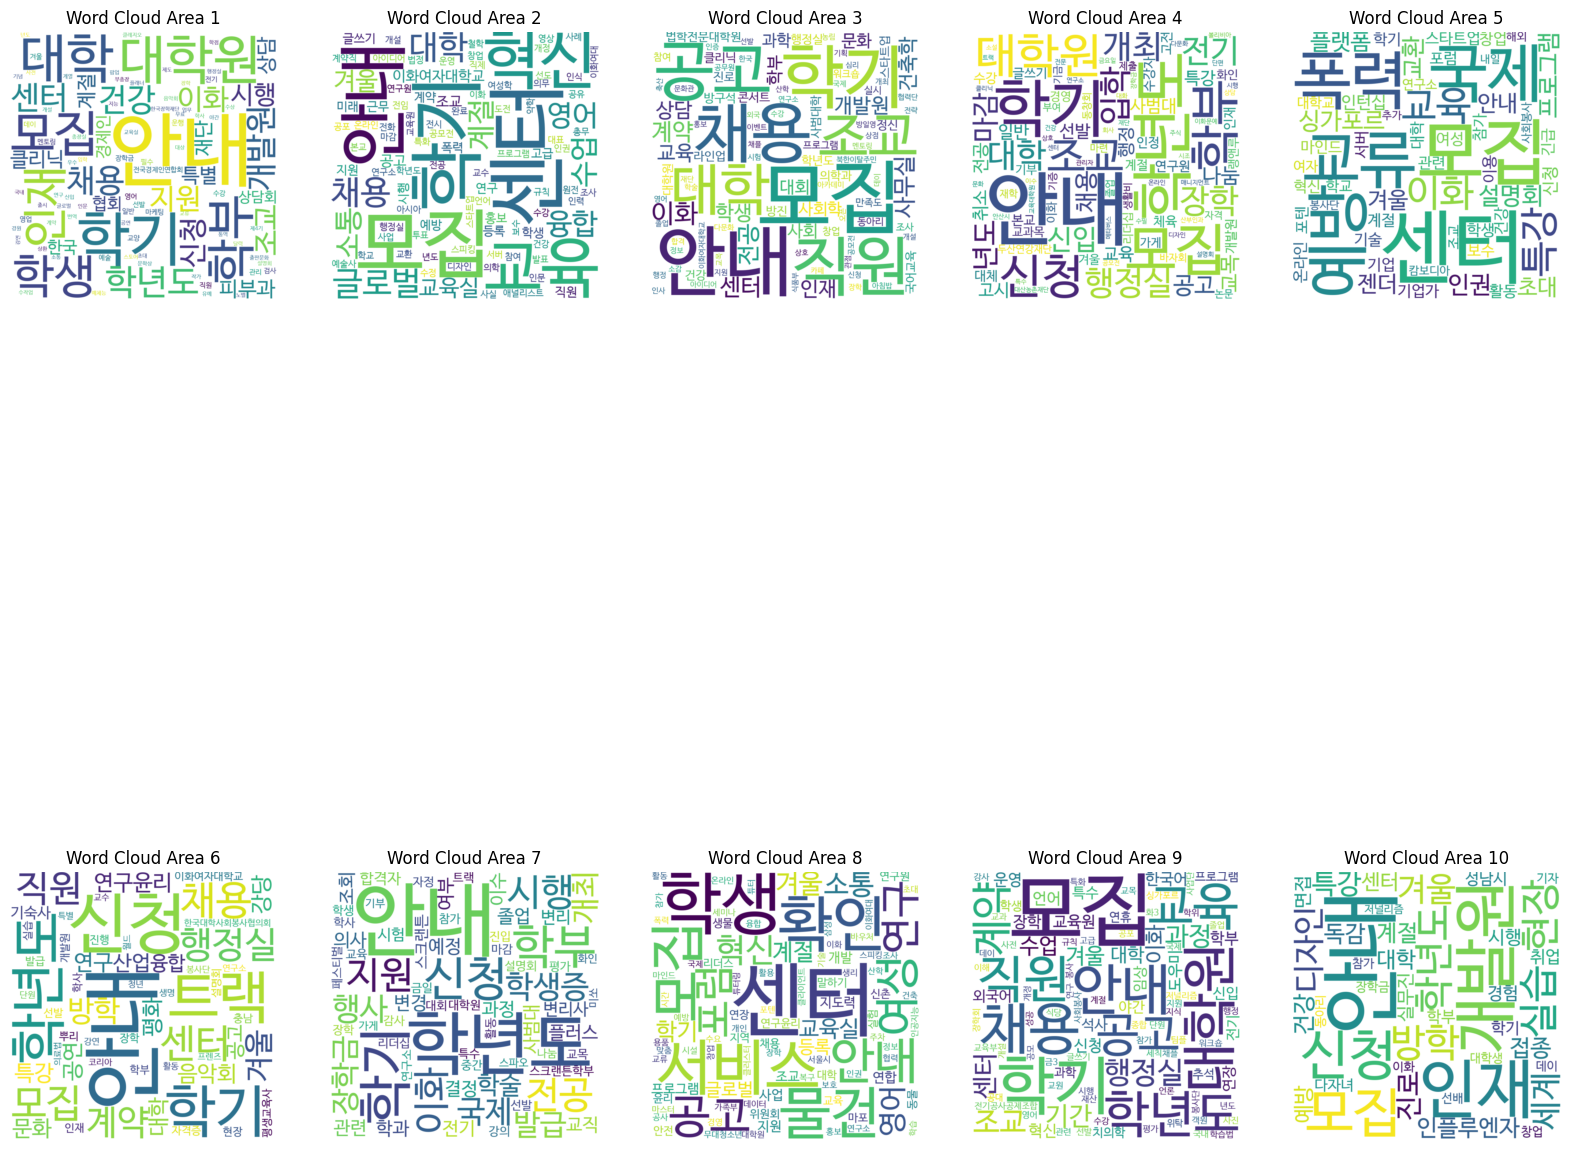

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# Wordcloud setting 설정

wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
               background_color = 'white',
               width = 1000,
               height = 1000,
               max_words = 100,
               max_font_size = 300,
               colormap='viridis')

fig, axes = plt.subplots(2, 5, figsize=(20, 20))

# 10개의 워드 클라우드를 각 subplot에 그리기
for i in range(10):
    row = i // 5  # 행 번호 계산
    col = i % 5   # 열 번호 계산

    dictionary = globals()[f'count_list{i}']
    wordcloud = wc.generate_from_frequencies(dictionary)

    axes[row, col].imshow(wordcloud, interpolation="bilinear")
    axes[row, col].set_title(f'Word Cloud Area {i+1}')
    axes[row, col].axis("off")




In [109]:
# 파일로 저장
wordcloud.to_file('wordcloud_Area10.png')